# Exploratory Data Analysis using Python (EDA) - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2022 by Jessica Addy*

This is an EDA of 2022's Stack Overflow Developer Survey, an annual and longest running survey of software developers (and anyone else who codes!) on Earth. I thought it would be a good idea to analyze information on Demographics, Programming abilities and experience, employment, and Stack Overflow Usage of respondents since developers frequently visit the website. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey. This Notebook makes use of Python packages like Pandas (for Data Cleaning/Manipulation), MatPlotlib (for Data Exploration), and Seaborn(for some Data Visualisation)

## Content
1. Import Libraries

2. Import CSV files

3. Data Processing and Cleaning

4. Data Exploration and Visualization

5. Closing Remarks and Links

## 1. Importing Libraries

Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and add more libraries when needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#setting basic styles
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

## 2. Importing Survey CSV Files
Import all the csv files (survey data + schema files) to be used in this notebook. 

In [2]:
#importing survey result file
survey_filename ='survey_results_public.csv'
survey_df = pd.read_csv(survey_filename, index_col='ResponseId')

In [3]:
survey_df.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
#this shows the list of columns which represent the shortcodes for questions asked
survey_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

##### Since the shortcodes for questions have been used as column names, you can refer to the schema file to see the full text of each question. It is loaded it as Pandas Series with `qname` as the index and the  `question` as the value.

In [5]:
schema_name = 'survey_results_schema.csv'
schema = pd.read_csv(schema_name, index_col='qname').question

In [6]:
schema.head()

qname
MainBranch          Which of the following options best describes ...
Employment          Which of the following best describes your cur...
RemoteWork          Which best describes your current work situation?
CodingActivities    Which of the following best describes the code...
EdLevel             Which of the following best describes the high...
Name: question, dtype: object

##### We can now use `schema_df` to retrieve the full question text for any column in `survey_df`.

In [7]:
schema['DevType']

'Which of the following describes your current job? Please select all that apply.'

## 3. Data Preparation and Cleaning
Though this survey responses contains a wealth of information, the analyses was limited to the following:

1. Demographics of the survey respondents
2. Programming skills, experience, and preferences
3. Employment-related information.
4. Stack Overflow Usage + Community

##### I selected only a subset of columns relavant for my analysis.

In [8]:
selected_columns = [
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'RemoteWork',
    
    #Programming Experience
    'DevType',
    'LearnCodeCoursesCert', 
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith', 
    
    #Employment
    'Employment',
    'WorkExp',
    'CompTotal',
    'CompFreq',
    
    #Stack Overflow Usage + Community
    'NEWSOSites',
    'SOVisitFreq',
    'SOAccount',
    'SOPartFreq',
    'SOComm'    
]

In [9]:
len(selected_columns)

18

In [10]:
survey_df = survey_df[selected_columns]

##### Let's view some basic information about the data frame.

In [11]:
survey_df.shape

(73268, 18)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   RemoteWork              58958 non-null  object 
 5   DevType                 61302 non-null  object 
 6   LearnCodeCoursesCert    29389 non-null  object 
 7   LanguageHaveWorkedWith  70975 non-null  object 
 8   LanguageWantToWorkWith  67027 non-null  object 
 9   Employment              71709 non-null  object 
 10  WorkExp                 36769 non-null  float64
 11  CompTotal               38422 non-null  float64
 12  CompFreq                44425 non-null  object 
 13  NEWSOSites              71365 non-null  object 
 14  SOVisitFreq             70961 non-null

In [13]:
survey_df.describe()

,WorkExp,CompTotal
count,36769.000000,3.842200e+04
mean,10.242378,2.342434e+52
std,8.706850,4.591478e+54
min,0.000000,0.000000e+00
25%,4.000000,3.000000e+04
50%,8.000000,7.750000e+04
75%,15.000000,1.540000e+05
max,50.000000,9.000000e+56


##### The gender column also allows for picking multiple options. I will replace values containing more than one option with `NaN` to simplify our analysis, then replace them with others.

In [14]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [15]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)
survey_df['Gender'] = survey_df['Gender'].replace('Or, in your own words:', 'other')
survey_df['Gender'] = survey_df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-binary')
survey_df.Gender = survey_df.Gender .fillna('other')
survey_df['Gender'].value_counts()

Man                  64607
Woman                 3399
other                 3386
Prefer not to say     1172
Non-binary             704
Name: Gender, dtype: int64

##### I created a helper function that converts a column with lists of values or multiple options,  (such as `Employmenet.DevType`)," into a data frame with a column for each potential choice.

In [16]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

##### The data is now cleaned and ready for analysis. Let's take a look at a sample of rows from the data frame.

In [17]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,RemoteWork,DevType,LearnCodeCoursesCert,LanguageHaveWorkedWith,LanguageWantToWorkWith,Employment,WorkExp,CompTotal,CompFreq,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm
ResponseId,,,,,,,,,,,,,,,,,,
56311,Pakistan,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)","Developer, full-stack",NaN,C++;Go;HTML/CSS;Java;JavaScript;PHP;Python;Sol...,Dart;Go;HTML/CSS;Java;JavaScript;PHP;Python;Ru...,"Employed, full-time",NaN,75000.0,Monthly,Stack Overflow,A few times per week,Yes,I have never participated in Q&A on Stack Over...,"No, not at all"
44658,Australia,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)","Developer, back-end;Cloud infrastructure engin...",NaN,Bash/Shell;Java,Go;Python;TypeScript,"Employed, full-time",NaN,NaN,Yearly,Stack Overflow;Stack Exchange,A few times per week,Yes,I have never participated in Q&A on Stack Over...,"No, not really"
14708,Germany,Under 18 years old,Prefer not to say,"Professional degree (JD, MD, etc.)",Full in-person,"Developer, full-stack",Udemy,Bash/Shell;HTML/CSS;JavaScript;PHP;Rust,Bash/Shell;Elixir;Go;Haskell;HTML/CSS;JavaScri...,"Employed, full-time",NaN,NaN,Monthly,Stack Overflow,A few times per month or weekly,No,NaN,Neutral
51492,El Salvador,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fully remote,"Developer, front-end;Developer, full-stack;Dev...",Udemy;Pluralsight;edX,C#;JavaScript;TypeScript,Dart;JavaScript;TypeScript,"Employed, full-time;Independent contractor, fr...",7.0,5400.0,Monthly,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,I have never participated in Q&A on Stack Over...,"No, not really"
61207,Finland,35-44 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","Developer, front-end;Developer, full-stack;Dev...",NaN,Bash/Shell;C#;HTML/CSS;Java;JavaScript;PHP;SQL...,Bash/Shell;C#;HTML/CSS;Java;JavaScript;PHP;SQL...,"Employed, full-time",21.0,5900.0,Monthly,Stack Overflow;Stack Exchange,A few times per week,Yes,A few times per month or weekly,"Yes, definitely"


## 4. Exploratory Analysis and Visualization

It would be beneficial to comprehend the respondents' demographics, such as their country of origin, age, gender, level of education, and work status, before we start asking questions regarding the survey results. Investigating these factors is crucial to determining how representative the study is of the global programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).



## Demographics
### Country
##### We'll examine the number of nations represented in the survey replies and display the top 10 nations by the volume of responses.

In [18]:
schema.Country

'Where do you live?'

##### Using the `value_counts` technique, we can determine which nations had the most replies.

In [19]:
top_10_countries = survey_df.Country.value_counts().head(10)
top_10_countries

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Name: Country, dtype: int64

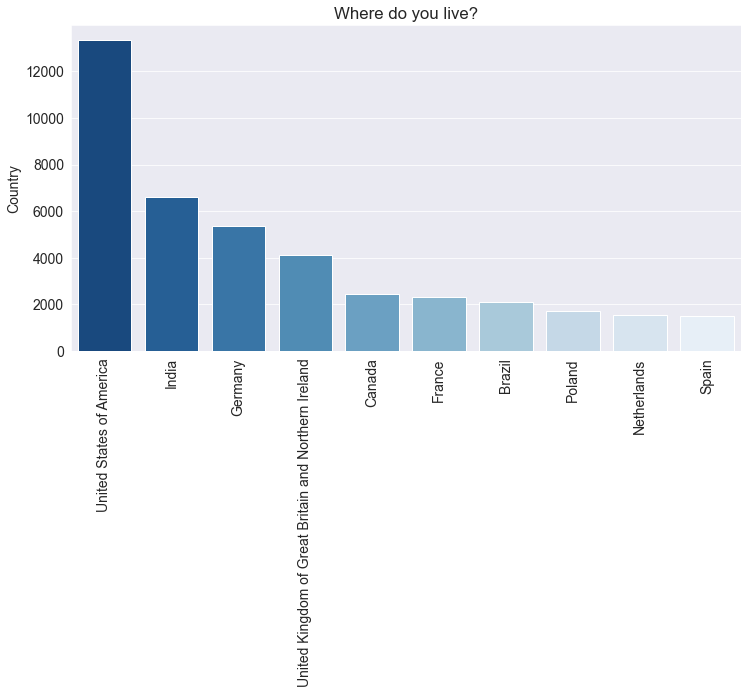

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation= 'vertical')
plt.title(schema.Country)
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Blues_r');

### Age
##### Another important aspect to consider is the age distribution of the respondents using a histogram. 

In [21]:
schema.Age

'What is your age?'

In [22]:
age_count = survey_df.Age.value_counts()
age_count

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

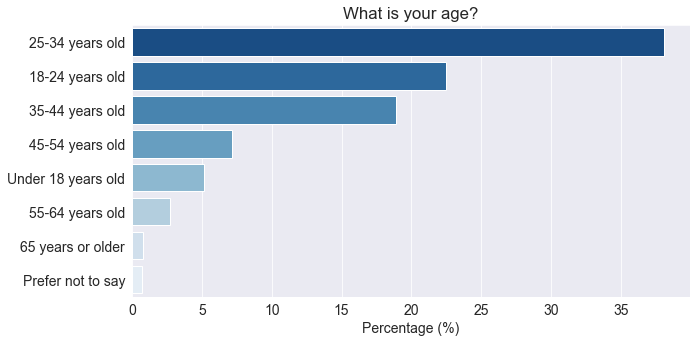

In [23]:
age = survey_df.Age.value_counts() * 100 / survey_df.Gender.count()
sns.barplot(x=age, y=age.index, palette = 'Blues_r')
plt.title(schema.Age)
plt.ylabel(None);
plt.xlabel('Percentage (%)');

### Gender

##### Let's have a look at the gender response distribution. We may anticipate a skewed distribution here given that women and non-binary genders are underrepresented in the programming community.

In [24]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [25]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                  64607
Woman                 3399
other                 3386
Prefer not to say     1172
Non-binary             704
Name: Gender, dtype: int64

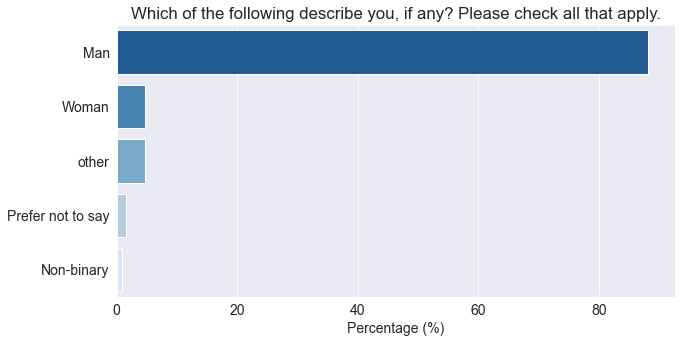

In [26]:
gender = survey_df.Gender.value_counts() * 100 / survey_df.Gender.count()
sns.barplot(x=gender, y=gender.index, palette = 'Blues_r')
plt.title(schema.Gender)
plt.ylabel(None);
plt.xlabel('Percentage (%)');

### Education Level

A formal education in computer science is frequently seen as being necessary in order to become a programmer. To learn programming, there are plenty free tools & lessons online, nevertheless. In order to better understand this, let's compare the respondents' educational backgrounds using a horizontal bar plot.

In [27]:
schema['EdLevel'] 

'Which of the following best describes the highest level of formal education that you’ve completed? *'

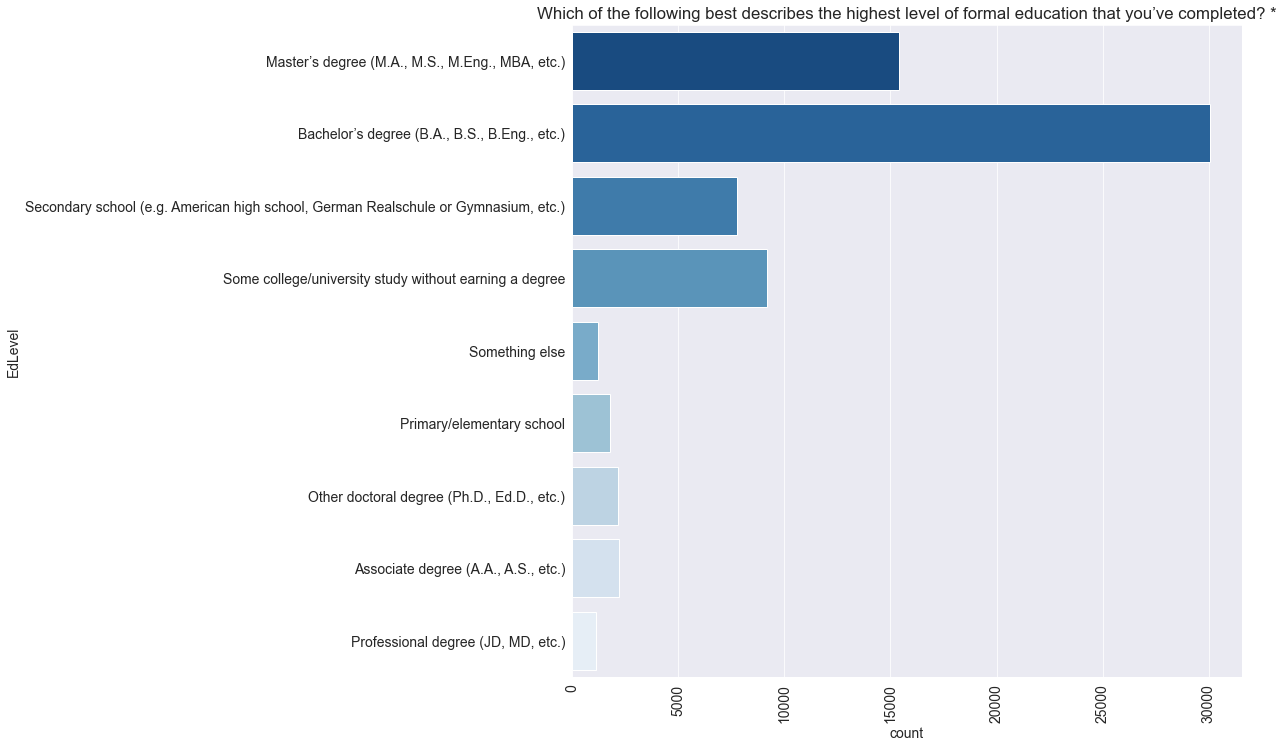

In [28]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation= 'vertical');
plt.title(schema['EdLevel'])
plt.ylabel(None)
sns.countplot(y=survey_df.EdLevel, palette = 'Blues_r');

##### A bachelor's or master's degree appears to be held by considerably over half of the respondents, indicating that most programmers have some college training. However, it's unclear from this graph alone whether they have a computer science degree or not.

### Remote Work
Remote work has grown in popularity with the advent of COVID 19 and may perhaps be the preferred choice for most programmers. Let's compare the respondents' working status (hybrid, totally in-person, entirely remote) using a horizontal bar plot to better comprehend the working environment for programmers.

In [29]:
schema.RemoteWork               

'Which best describes your current work situation?'

In [30]:
remoteWork_counts = survey_df.RemoteWork.value_counts()
remoteWork_counts

Fully remote                            25100
Hybrid (some remote, some in-person)    24815
Full in-person                           8538
Name: RemoteWork, dtype: int64

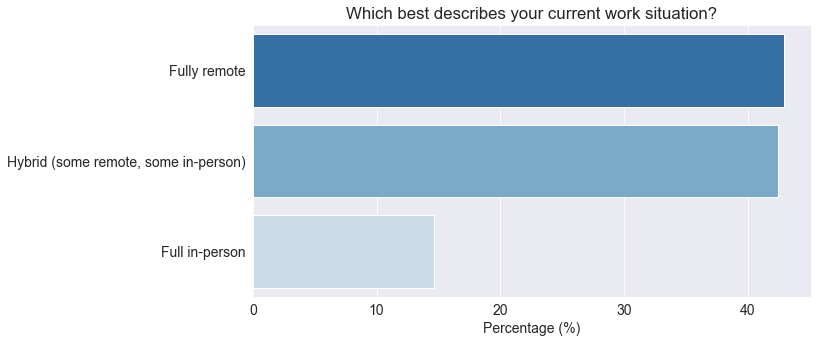

In [31]:
remote = survey_df.RemoteWork.value_counts() * 100 / survey_df.RemoteWork.count()
sns.barplot(x=remote, y=remote.index, palette = 'Blues_r')
plt.title(schema.RemoteWork)
plt.ylabel(None);
plt.xlabel('Percentage (%)');

## Programming Abilities and Experience
### Type of Developer

In [32]:
schema.DevType

'Which of the following describes your current job? Please select all that apply.'

In [33]:
devtype_df = split_multicolumn(survey_df.DevType)
devtype_df.head()

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
devtype_totals = devtype_df.sum().sort_values(ascending=False)
devtype_totals.head(10)

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
dtype: int64

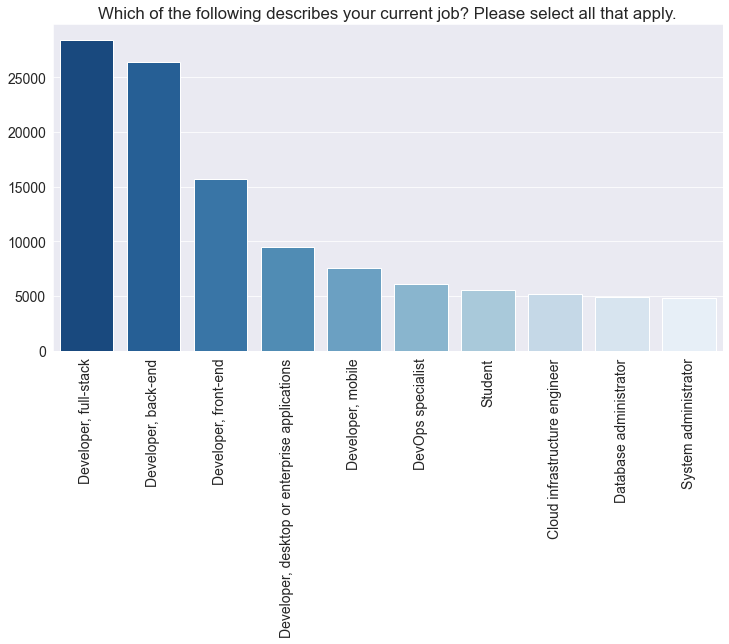

In [35]:
top_10_devtype = devtype_totals.head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation= 'vertical')
plt.title(schema.DevType)
sns.barplot(x=top_10_devtype.index, y=top_10_devtype, palette = 'Blues_r');

### Coding Resources

In [36]:
schema.LearnCodeCoursesCert  

'What online courses or certifications do you use to learn to code? Select all that apply.'

In [37]:
learncode_df = split_multicolumn(survey_df.LearnCodeCoursesCert)
learncode_df.head()

,Coursera,Udemy,Codecademy,Pluralsight,edX,Udacity,Other,Skillsoft
ResponseId,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False


In [38]:
learncode_totals = learncode_df.sum().sort_values(ascending=False)

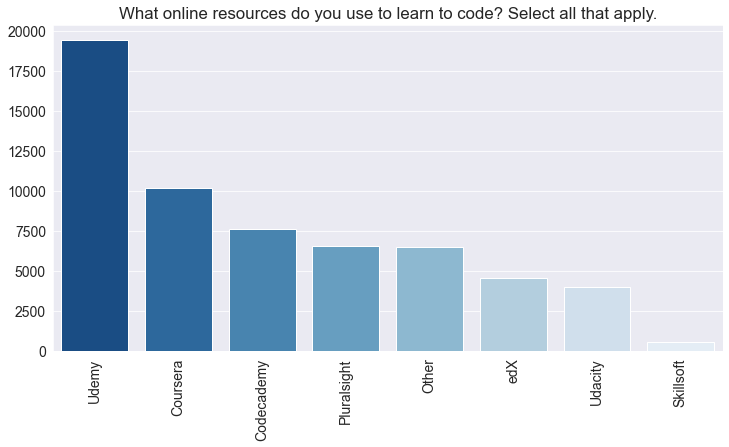

In [39]:
plt.figure(figsize=(12,6))
plt.xticks(rotation= 'vertical')
plt.title(schema.LearnCodeOnline)
sns.barplot(x= learncode_totals.index, y= learncode_totals, palette = 'Blues_r');

### Languages Worked With

In [40]:
survey_df.LanguageHaveWorkedWith

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [41]:
language_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
language_df.head()

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
languages_percentage = language_df.mean().sort_values(ascending=False) * 100
languages_percentage.head()

JavaScript    62.740896
HTML/CSS      52.838893
SQL           47.472293
Python        46.093793
TypeScript    33.397936
dtype: float64

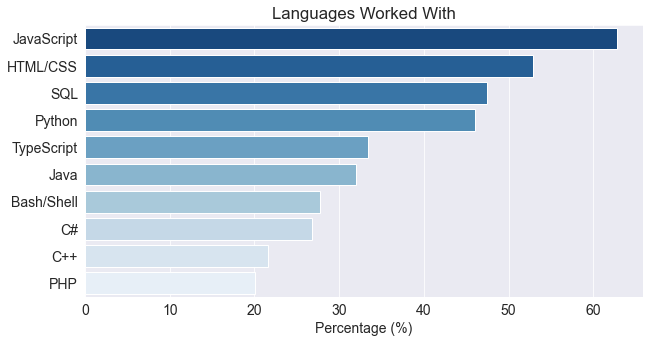

In [43]:
sns.barplot(x= languages_percentage.head(10), y=languages_percentage.head(10).index, palette = 'Blues_r')
plt.title('Languages Worked With')
plt.ylabel(None);
plt.xlabel('Percentage (%)');

### Languages Desired To Learn 

In [44]:
survey_df.LanguageWantToWorkWith  

ResponseId
1                                                   NaN
2                                       Rust;TypeScript
3                 C#;C++;HTML/CSS;JavaScript;TypeScript
4                                     C#;SQL;TypeScript
5            C#;Elixir;F#;Go;JavaScript;Rust;TypeScript
                              ...                      
73264    Bash/Shell;Go;JavaScript;Python;SQL;TypeScript
73265                        HTML/CSS;JavaScript;Python
73266             C#;HTML/CSS;JavaScript;PHP;Python;SQL
73267                                            Delphi
73268                        PowerShell;Rust;TypeScript
Name: LanguageWantToWorkWith, Length: 73268, dtype: object

In [45]:
desired_language_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
desired_language_df.head()

,Rust,TypeScript,C#,C++,HTML/CSS,JavaScript,SQL,Elixir,F#,Go,...,Assembly,Solidity,R,Crystal,Objective-C,SAS,OCaml,MATLAB,Fortran,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [46]:
desired_language_percentage = desired_language_df.mean().sort_values(ascending=False) * 100
desired_language_percentage.head(10)

JavaScript    42.631162
Python        39.639406
TypeScript    35.195447
HTML/CSS      34.298739
SQL           33.546705
Rust          22.993667
C#            21.174319
Go            20.955943
Java          18.026969
Bash/Shell    17.811323
dtype: float64

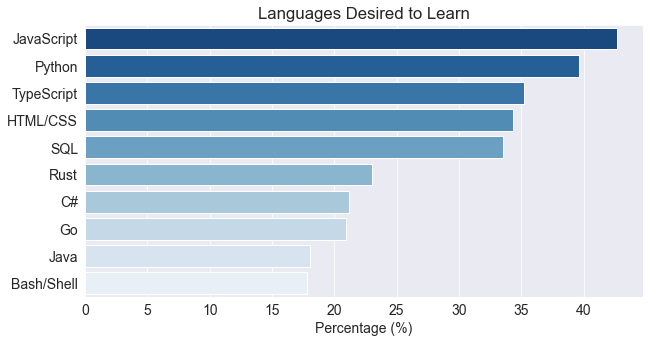

In [47]:
sns.barplot(x= desired_language_percentage.head(10), y=desired_language_percentage.head(10).index, palette = 'Blues_r')
plt.title('Languages Desired to Learn')
plt.ylabel(None);
plt.xlabel('Percentage (%)');

## Employment

Programmers frequently choose between contract or freelance work, therefore it would be interesting to analyze the distribution of full-time, part-time, and freelance employment. 

In [48]:
schema.Employment

'Which of the following best describes your current employment status?'

In [49]:
survey_df.Employment.value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

In [50]:
#Using the helper function to split the response into a stand-alone column
emp_type_df = split_multicolumn(survey_df.Employment)
emp_type_df.head()

,"Employed, full-time","Student, full-time","Student, part-time","Not employed, but looking for work","Independent contractor, freelancer, or self-employed","Employed, part-time","Not employed, and not looking for work",Retired,I prefer not to say
ResponseId,,,,,,,,,
1,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False


In [51]:
emp_type_totals = emp_type_df.sum().sort_values(ascending = False)
emp_type_totals

Employed, full-time                                     48808
Student, full-time                                      10752
Independent contractor, freelancer, or self-employed    10604
Employed, part-time                                      4089
Student, part-time                                       3672
Not employed, but looking for work                       3321
Not employed, and not looking for work                   1205
I prefer not to say                                       599
Retired                                                   384
dtype: int64

##### As one might expect, the most common employment type is "Employed, full-time" 

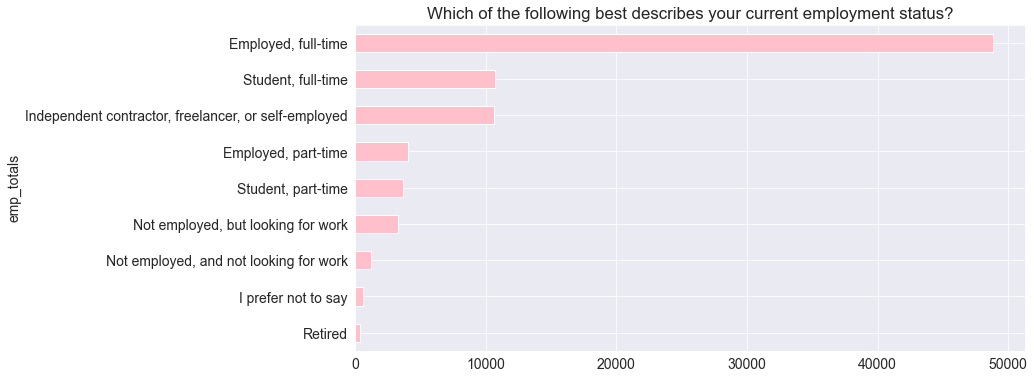

In [52]:
emp_type_totals.sort_values(ascending = True ).plot(
                                                kind= 'barh', 
                                                color = 'pink', 
                                                figsize = (12,6), 
                                                title = schema.Employment, 
                                                xlabel = 'emp_totals');

### Total Compensation (salary, bonuses, and perks, before taxes and deductions)

In [53]:
schema.CompFreq

'Is that compensation weekly, monthly, or yearly?'

In [54]:
survey_df.CompFreq = survey_df.CompFreq .fillna('other')
comp_freq_counts = survey_df.CompFreq.value_counts()
comp_freq_counts

other      29195
Yearly     23052
Monthly    19864
Weekly      1157
Name: CompFreq, dtype: int64

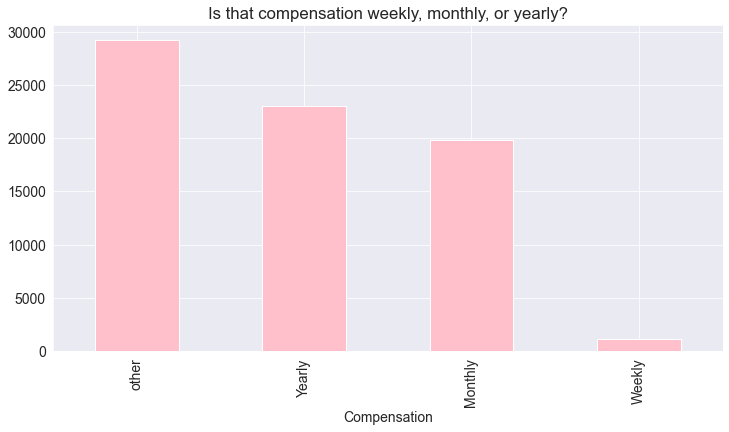

In [55]:
comp_freq_counts.sort_values(ascending = False ).plot(
                                                kind= 'bar', 
                                                color = 'pink', 
                                                figsize = (12,6), 
                                                title = schema.CompFreq, 
                                                xlabel = 'Compensation');

In [56]:
schema.CompTotal

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [57]:
# Median Salary of this survey
survey_df.CompTotal.median()

77000.0

## Stack Overflow Usage and Community

### Stack Overflow Account

In [58]:
schema.SOAccount

'Do you have a Stack Overflow account?'

In [59]:
account = survey_df['SOAccount'].value_counts()
account

Yes                        57956
No                          8865
Not sure/can't remember     4059
Name: SOAccount, dtype: int64

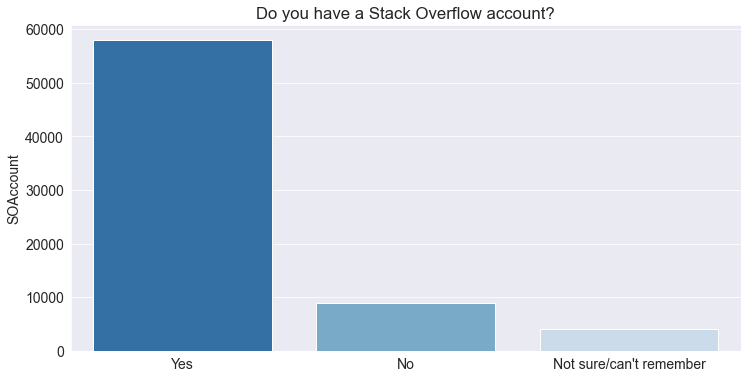

In [60]:
plt.figure(figsize=(12,6))
plt.title(schema.SOAccount)
sns.barplot(x= account.index, y= account, palette = 'Blues_r');

### Stack Overflow Sites  Visits

In [61]:
schema.NEWSOSites

'Which of the following Stack Overflow sites have you visited? Select all that apply.'

In [62]:
#Using the helper function to split the response into a stand-alone column
newsosites_df = split_multicolumn(survey_df.NEWSOSites)
newsosites_df.head()

,Collectives on Stack Overflow,Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies),Stack Overflow,Stack Exchange,I have never visited Stack Overflow or the Stack Exchange network
ResponseId,,,,,
1,False,False,False,False,False
2,True,True,True,True,False
3,True,False,True,True,False
4,True,True,True,True,False
5,True,True,True,True,False


In [63]:
site_totals = newsosites_df.sum().sort_values(ascending = False)
site_totals

Stack Overflow                                                                                 69212
Stack Exchange                                                                                 48678
Collectives on Stack Overflow                                                                   6699
Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies)     4121
I have never visited Stack Overflow or the Stack Exchange network                                450
dtype: int64

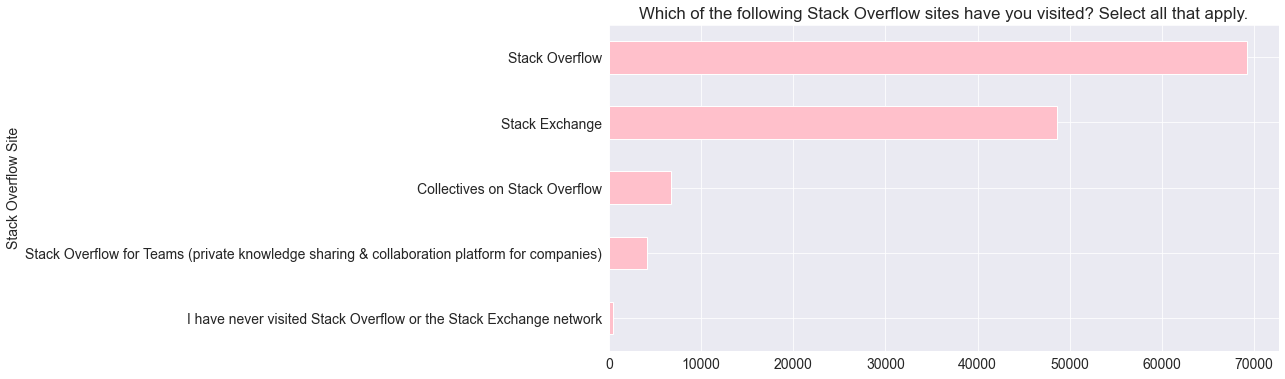

In [64]:
site_totals.sort_values(ascending = True ).plot(
                                                kind= 'barh', 
                                                color = 'pink', 
                                                figsize = (12,6), 
                                                title = schema.NEWSOSites, 
                                                xlabel = 'Stack Overflow Site');

### Frequency of Stack Overflow Site  Visits

In [65]:
schema.SOVisitFreq

'How frequently would you say you visit Stack Overflow?'

In [66]:
sovisitfreq= survey_df['SOVisitFreq'].value_counts()
sovisitfreq

Daily or almost daily                  21529
A few times per week                   19580
Multiple times per day                 15845
A few times per month or weekly        11037
Less than once per month or monthly     2291
Name: SOVisitFreq, dtype: int64

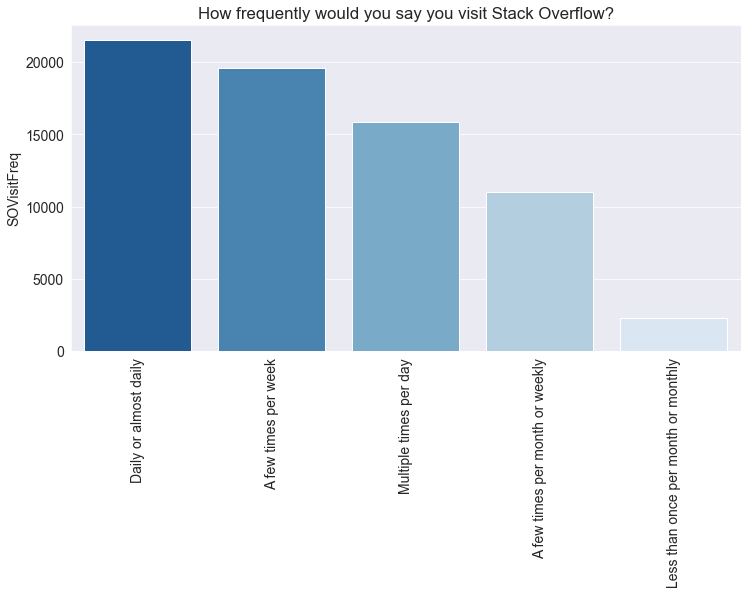

In [67]:
plt.figure(figsize=(12,6))
plt.xticks(rotation= 'vertical')
plt.title(schema.SOVisitFreq)
sns.barplot(x= sovisitfreq.index, y= sovisitfreq, palette = 'Blues_r');

### Stack Overflow Community

In [68]:
schema.SOComm

'Do you consider yourself a member of the Stack Overflow community?'

In [69]:
comm= survey_df['SOComm'].value_counts()
comm

Yes, somewhat      19520
No, not really     18503
Neutral            14806
Yes, definitely    10302
No, not at all      6356
Not sure            1231
Name: SOComm, dtype: int64

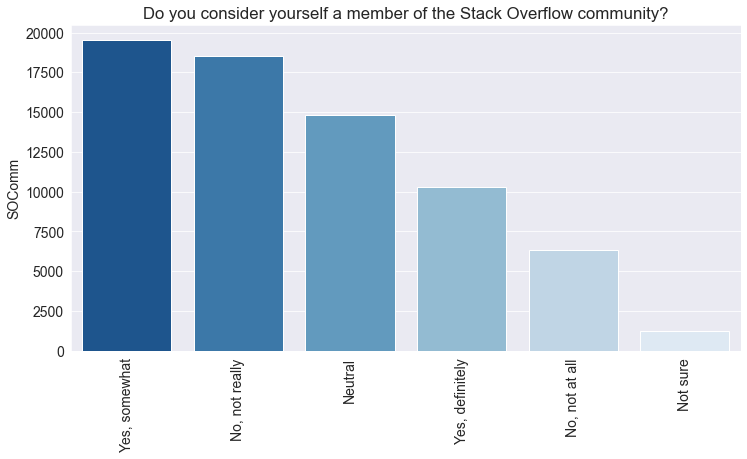

In [70]:
plt.figure(figsize=(12,6))
plt.xticks(rotation= 'vertical')
plt.title(schema.SOComm)
sns.barplot(x= comm.index, y= comm, palette = 'Blues_r');

## ADDITIONAL INSIGHTS

##### 1. Number Percentage of respondents work in roles related to data science?* 

In [71]:
ds_ml_respondents = devtype_totals['Data scientist or machine learning specialist']
ds_ml_respondents

3377

In [72]:
dev_type = survey_df.DevType.value_counts() / survey_df.DevType.count()  * 100
dev_type['Data scientist or machine learning specialist']
round(dev_type['Data scientist or machine learning specialist'], 2)

0.81

 ##### 2. Number Percentage of respondents work in roles related to data and business analyst?* 

In [73]:
dba_respondents = devtype_totals['Data or business analyst']
dba_respondents

3166

In [74]:
dev_type = survey_df.DevType.value_counts() / survey_df.DevType.count() * 100
dev_type['Data or business analyst']
round(dev_type['Data or business analyst'], 2)

0.4